# Python for visualization and Churn Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the datasets
customers = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Books\Marketing and Revenue Analytics\Portfolio Project on Data Driven Revenue Optimization - Big Data\customers.csv", parse_dates=["signup_date"])
subscriptions = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Books\Marketing and Revenue Analytics\Portfolio Project on Data Driven Revenue Optimization - Big Data\subscriptions.csv", parse_dates=["subscription_start", "subscription_end"])
transactions = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Books\Marketing and Revenue Analytics\Portfolio Project on Data Driven Revenue Optimization - Big Data\transactions.csv", parse_dates=["purchase_date"])

In [36]:
# Preview data
#print(customers.head(), "\n")
print(subscriptions.head(), "\n")
#print(transactions.head())

   customer_id subscription_start subscription_end plan_type  plan_price  \
0            1         2021-08-31              NaT     Basic         499   
1            2         2021-06-06              NaT  Standard         799   
2            3         2023-03-25              NaT     Basic         499   
3            4         2022-02-05       2023-05-21  Standard         799   
4            5         2022-07-18              NaT     Basic         499   

   churned subscriptions_month  
0        0             2021-08  
1        0             2021-06  
2        0             2023-03  
3        1             2022-02  
4        0             2022-07   



# Churn Anlaysis and Visualization

C:\Users\Asus\AppData\Local\Temp\ipykernel_13168\2723603227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "churned", data = subscriptions, palette = ["green", "red"])


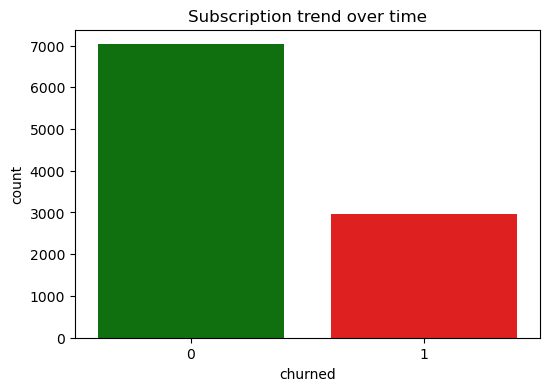

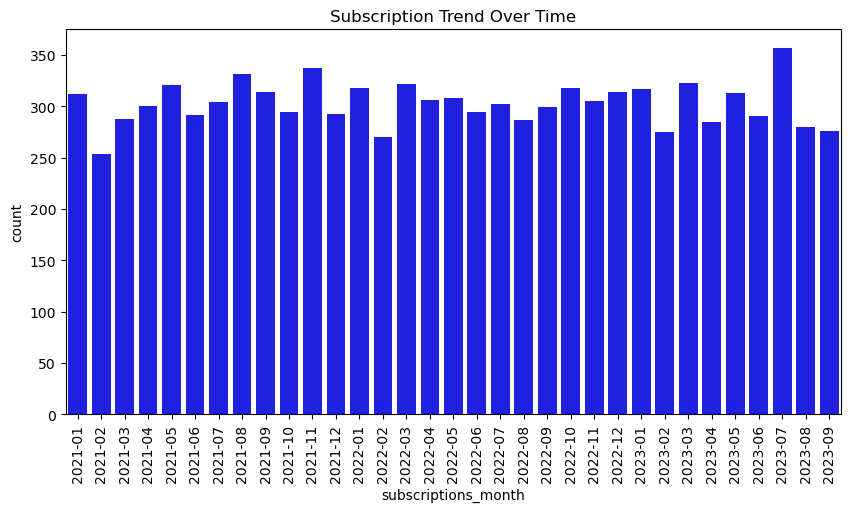

In [32]:
# Create a Churn Flag (1 = Churned, 0 = Active)
subscriptions['churned'] = subscriptions['subscription_end'].notna().astype(int)

# plot churn rate (Churn Distribution)
plt.figure(figsize=(6,4))
sns.countplot(x = "churned", data = subscriptions, palette = ["green", "red"])
#plt.xticks([0,1]["Active","churned"])
plt.title("Subscription trend over time")
plt.show()

# Subscription Trends Over Time
subscriptions["subscriptions_month"] = subscriptions["subscription_start"].dt.to_period("M")
#print(subscriptions.head())
plt.figure(figsize=(10,5))
sns.countplot(x = subscriptions["subscriptions_month"].astype(str), 
             order = sorted(subscriptions["subscriptions_month"].astype(str).unique()), color="blue")
plt.xticks(rotation = 90)
plt.title("Subscription Trend Over Time")
plt.show()

# Predicting Churn using ML

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare Features and target
subscriptions["subscription_duration"] = (subscriptions["subscription_end"] - subscriptions["subscription_start"]).dt.days.fillna(365)
features = subscriptions[["plan_price", "subscription_duration"]]
target = subscriptions["churned"]
print(subscriptions.head())

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# Train Model
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

   customer_id subscription_start subscription_end plan_type  plan_price  \
0            1         2021-08-31              NaT     Basic         499   
1            2         2021-06-06              NaT  Standard         799   
2            3         2023-03-25              NaT     Basic         499   
3            4         2022-02-05       2023-05-21  Standard         799   
4            5         2022-07-18              NaT     Basic         499   

   churned subscriptions_month  subscription_duration  
0        0             2021-08                  365.0  
1        0             2021-06                  365.0  
2        0             2023-03                  365.0  
3        1             2022-02                  470.0  
4        0             2022-07                  365.0  
Accuracy: 0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1414
           1       1.00      0.99      1.00       586

    accuracy              

# Visualizing Revenue Trends

In [58]:
# Extract year-month for transactions
transactions["purchase_month"] = transactions["purchase_date"].dt.to_period("M")
print(transactions.head())
# Aggregate revenue per month
monthly_revenue = transactions.groupby("purchase_month")["amount"].sum().reset_index()

# Convert period to string for plotting
monthly_revenue["purchase_month"] = monthly_revenue["purchase_month"].astype(str)

# Print preview
print(monthly_revenue.head())

   customer_id purchase_date      amount purchase_month
0            4    2022-08-19  826.298394        2022-08
1            4    2022-06-03  916.129495        2022-06
2            4    2022-02-06  856.645107        2022-02
3           12    2022-08-10  522.925288        2022-08
4           12    2023-01-14  550.805685        2023-01
  purchase_month        amount
0        2021-01   9490.179282
1        2021-02  19037.336881
2        2021-03  34999.162855
3        2021-04  63784.642339
4        2021-05  58488.397449


C:\Users\Asus\AppData\Local\Temp\ipykernel_13168\926150946.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = monthly_revenue, x = "purchase_month", y = "amount", marker = 'o', palette = ["blue","red"])


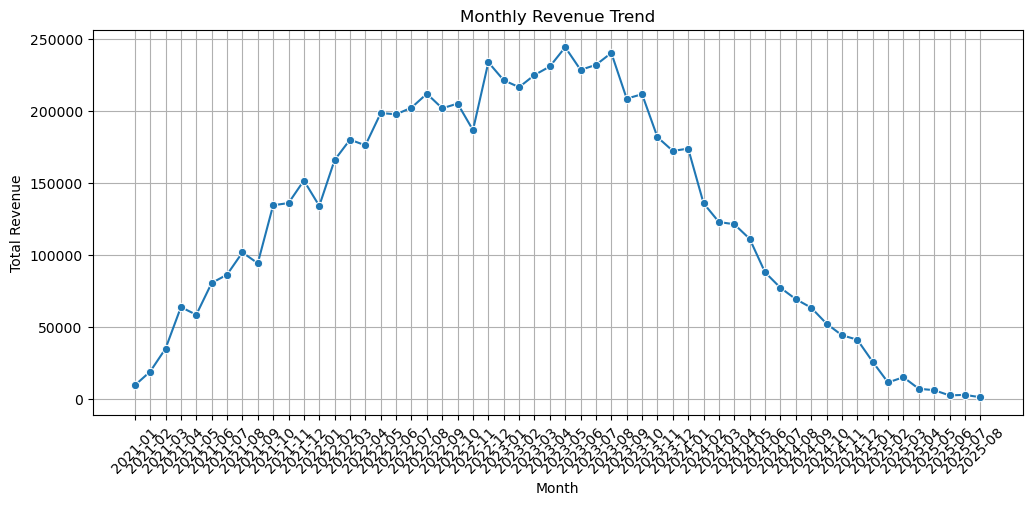

In [80]:
# Plot Monthly Revenue Trends
plt.figure(figsize=(12,5))
sns.lineplot(data = monthly_revenue, x = "purchase_month", y = "amount", marker = 'o', palette = ["blue","red"])
plt.xticks(rotation = 45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

# Revenue Distribution by Subscription Plan

C:\Users\Asus\AppData\Local\Temp\ipykernel_13168\1018437110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = subscriptions, x = "plan_type", y = "plan_price", palette = "coolwarm")


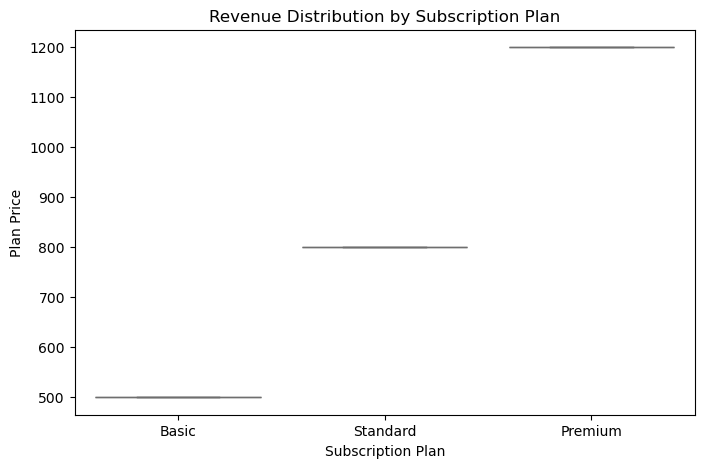

In [91]:
plt.figure(figsize=(8,5))
sns.boxplot(data = subscriptions, x = "plan_type", y = "plan_price", palette = "coolwarm")
plt.title("Revenue Distribution by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Plan Price")
plt.show()

# Revenue Impact of Churned vs. Active customers

   customer_id subscription_start subscription_end plan_type  plan_price  \
0            1         2021-08-31              NaT     Basic         499   
1            2         2021-06-06              NaT  Standard         799   
2            3         2023-03-25              NaT     Basic         499   
3            4         2022-02-05       2023-05-21  Standard         799   
4            4         2022-02-05       2023-05-21  Standard         799   

   churned subscriptions_month  subscription_duration purchase_date  \
0        0             2021-08                  365.0           NaT   
1        0             2021-06                  365.0           NaT   
2        0             2023-03                  365.0           NaT   
3        1             2022-02                  470.0    2022-08-19   
4        1             2022-02                  470.0    2022-06-03   

       amount purchase_month  
0         NaN            NaT  
1         NaN            NaT  
2         NaN          

C:\Users\Asus\AppData\Local\Temp\ipykernel_13168\2121727154.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = churn_revenue_grouped, x = "churned", y = "amount", palette = ["green","red"])


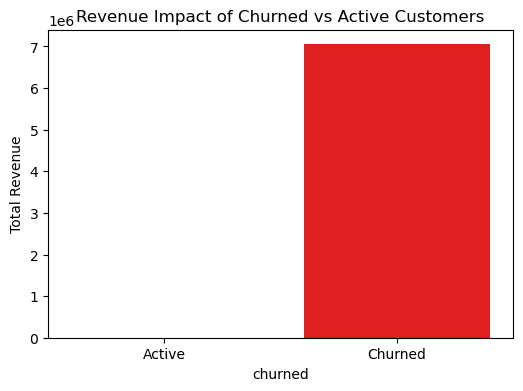

In [102]:
# Merge subscriptions with transactions to link churn status
churn_revenue = subscriptions.merge(transactions, on = "customer_id", how = "left")
print(churn_revenue.head())

# Aggregate revene by churn status
churn_revenue_grouped = churn_revenue.groupby("churned")["amount"].sum().reset_index()

# Plot revenue by churn status
plt.figure(figsize=(6,4))
sns.barplot(data = churn_revenue_grouped, x = "churned", y = "amount", palette = ["green","red"])
plt.xticks([0,1],["Active","Churned"])
plt.title("Revenue Impact of Churned vs Active Customers")
plt.ylabel("Total Revenue")
plt.show()

# Analyzing A/B test results in Python

In [105]:
import scipy.stats as stats

In [115]:
# Sample A/B test Results
data = {
    "test_group":["A","B"],
    "total_customers":[1000, 1000],
    "converted_customers":[300,250],
    "total_revenue":[50000, 42000]
}
df = pd.DataFrame(data)

# Compute conversion Rates
df["conversion_rate"] = df["converted_customers"]/ df["total_customers"]
df["avg_revenue_per_customer"] = df["total_revenue"]/ df["total_customers"]

# Perform statistical significance test (Chi-Square)

chi2, p_value = stats.chisquare(df["converted_customers"])

print(df)
print(f"chi-square test p value: {p_value}")

  test_group  total_customers  converted_customers  total_revenue  \
0          A             1000                  300          50000   
1          B             1000                  250          42000   

   conversion_rate  avg_revenue_per_customer  
0             0.30                      50.0  
1             0.25                      42.0  
chi-square test p value: 0.0330062576612325
